# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Learning Objectives
- Produce a model with l2 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with l1 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with both l1 and l2 regularization terms, with a statistically significant improvement over a model without regularization.
- Produce a logistic regression model with a statistically significant improvement over the null model (a model without input - variables).
- Produce a generalized additive model with a statistically significant improvement over the null model (a model without input variables).

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('House Prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 Question 1.1: Drop the Id column as it is not needed for prediction

In [70]:
data = data.drop(labels='Id', axis=1)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 Question 1.2: Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

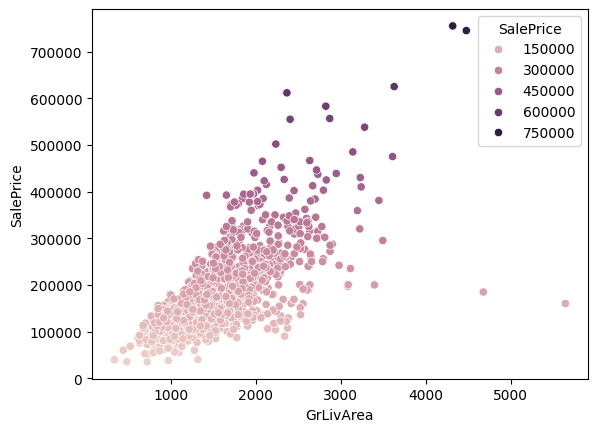

In [71]:
import matplotlib.pyplot as plt

sns.scatterplot(data, x='GrLivArea', y='SalePrice', hue='SalePrice') # Hue isn't really too useful here

# Several outliers, could argue for between 6-11 total or more if we want a tighter distribution.
# 2 are over 700000 in sale price and are barely over 4000 GrLivArea
# 4 are over 4000 in GrLivArea but are < 200000 sale price
# There are a few that are slight outliers on both axis


 Question 1.3: Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

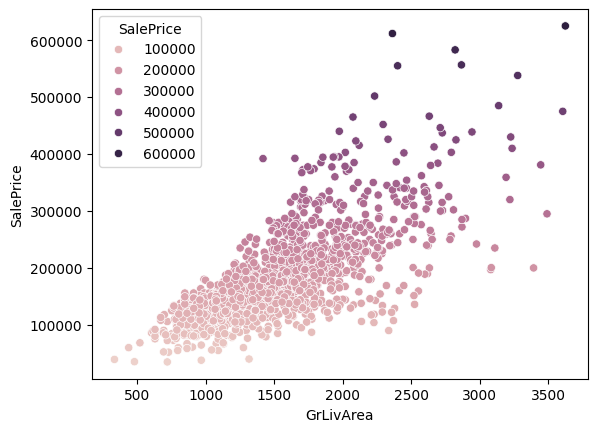

In [72]:
# Remove outliers for data['GrLivArea']>4000
data = data[data['GrLivArea'] < 4000]

#To Do Create a scatter plot
sns.scatterplot(data, x='GrLivArea', y='SalePrice', hue='SalePrice')

Quesiont 2.1: Convert categorical variable into dummy variables using pandas get_dummies API


In [73]:
data = pd.get_dummies(data)#, drop_first=True)


Question 2.2: Impute missing data by the median of each column.

In [74]:
meds = data.median()
data = data.fillna(meds)

Question 2.2b: Make sure that there are no null values remaining

In [75]:
data.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 287, dtype: int64

Question 2.3: Generate train test split 70/30. Set random_state=42

In [76]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Question 3.1: Train a linear regression algorithm to predict `SalePrice` from the remaining features.

In [77]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error

# Fit a linear regression model to this data
regr = LinearRegression().fit(X_train, y_train)

Question 3.2: Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [78]:
from math import sqrt

#Compute the RMSE
y_pred = regr.predict(X_test)

#print(regr.intercept_, regr.coef_, regr.score(X, y))

#print('Predictions:', y_pred)
#print('Coefficients:\n', regr.coef_)
print('Intercept: ', regr.intercept_)
#residuals = y_test - y_pred
#print('residuals:\n', residuals)
#print('R^2 Accuracy:', regr.score(X, y))
print('MSE: ', mean_squared_error(y_test, y_pred)) # this seems low
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) # this seems very low



Intercept:  1.8335413187742233e-09
MSE:  4.15206053120622e-21
RMSE:  6.443648447274432e-11


We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

Question 4.1: Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [79]:
from sklearn import linear_model

# Have to come up with a way to use the Lasso, K-fold CV is an option
# Taken from Case Study 7
def mse(y_hat, y):
    """Calculate Mean Squared Error"""
    return np.sum(np.square(y_hat - y)) / y.size

def lasso_cv(X, y, alpha_val, k):
    """Perform the lasso with
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion is folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)

    MSEs = []
    Coefs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)

        # Fit model
        model = linear_model.Lasso(alpha=alpha_val, fit_intercept=True, max_iter=1000000).fit(X_train, y_train) #normalize was deprecated?

        # Measure MSE
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]

    return model, MSEs

model, mses = lasso_cv(X, y, 0.000001, 5) #linear_model.Lasso(alpha=0.000001)

print(mses)

[4.587241817891979e-08, 9.275669809391926e-06, 3.3773895026080434e-08, 4.465142746516014e-08, 5438804.739678864]


Question 4.2: Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model)

In [80]:
alpha_vals = np.arange(0.01, 5, .01) # values of alpha we want to iterate over

models = []
MSEs    = []
coefs   = {}
for l in alpha_vals:
    model, mses = lasso_cv(X, y, alpha_val=l, k=5)
    models += [model]
    MSEs +=  [np.mean(mses)]
    coefs[l] = [model.coef_]



Question 4.3: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

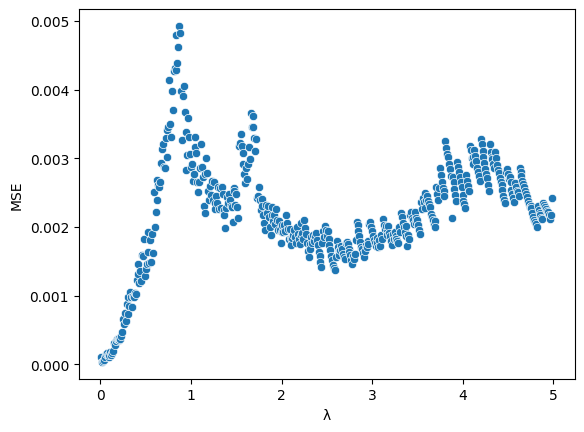

In [81]:
sns.scatterplot(x='λ', y='MSE', data=pd.DataFrame({'λ': alpha_vals, 'MSE': MSEs}));

Question 4.4: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`!

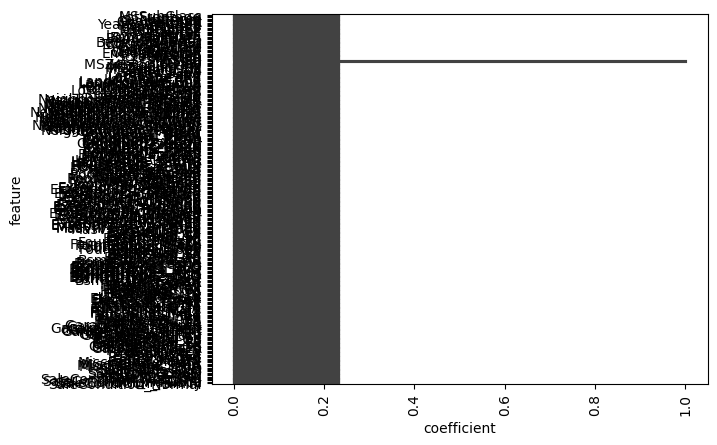

,feature,coefficient
0,MSSubClass,0.229665
1,LotFrontage,0.229665
2,LotArea,0.229665
3,OverallQual,0.229665
4,OverallCond,0.229665
...,...,...
567,SaleCondition_Abnorml,0.000000
568,SaleCondition_AdjLand,-0.000000
569,SaleCondition_Alloca,0.000000
570,SaleCondition_Family,0.000000


In [82]:
# I can't seem to get this to work in a usable way, I don't know how to plot it. I've tried a few dozen different ways.
# I am giving up for now so that I can submit something in time.
# I believe as we increase the alpha value we should see some coefficients (the superfluous ones) go to 0 weight
'''
print(len(coefs))

num_features = len(coefs[alpha_vals[0]])

for i in range(num_features):
    plt.plot(alpha_vals, [coefs[alpha][i] for alpha in alpha_vals], label=f'Coefficient')

plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Change in Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()
'''

λ = min(zip(MSEs, alpha_vals))[1]
model = linear_model.Lasso(alpha=λ, fit_intercept=True, max_iter=1000000).fit(X, y)
intercept  = pd.DataFrame({'feature': X.columns, 'coefficient': model.intercept_})
lasso_a_df = pd.concat([intercept, pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})], ignore_index=True)
ax = sns.barplot(x='coefficient', y='feature', data=lasso_a_df);
plt.xticks(rotation=90)
plt.show();

display(lasso_a_df)

Question 5.1: Repeat steps in Question 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]

In [83]:
def ridge_cv(X, y, alpha_val, k):
    """Perform the ridge with
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion is folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)

    MSEs = []
    Coefs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)

        # Fit model
        model = linear_model.Ridge(alpha=alpha_val, fit_intercept=True, max_iter=1000000).fit(X_train, y_train) #normalize was deprecated?

        # Measure MSE
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]

    return model, MSEs

In [84]:
alpha_vals_ridge = np.arange(0.1, 200, 1)

models_ridge = []
MSEs_ridge    = []
Coefs_ridge   = {}
for l in alpha_vals_ridge:
    model, mses = ridge_cv(X, y, alpha_val=l, k=5)
    models_ridge += [model]
    MSEs_ridge += [np.mean(mses)]
    Coefs_ridge[l] = [model.coef_]

In [85]:
# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)


Question 5.2: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

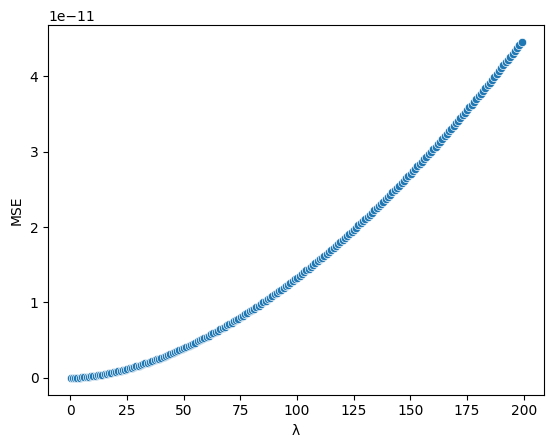

In [86]:
sns.scatterplot(x='λ', y='MSE', data=pd.DataFrame({'λ': alpha_vals_ridge, 'MSE': MSEs_ridge}));

Question 5.3: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

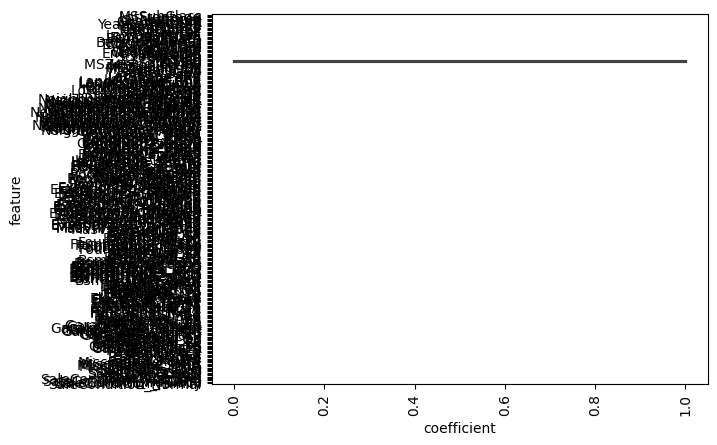

,feature,coefficient
0,MSSubClass,-3.963942e-08
1,LotFrontage,-3.963942e-08
2,LotArea,-3.963942e-08
3,OverallQual,-3.963942e-08
4,OverallCond,-3.963942e-08
...,...,...
567,SaleCondition_Abnorml,-8.945939e-10
568,SaleCondition_AdjLand,5.122656e-12
569,SaleCondition_Alloca,-3.382331e-10
570,SaleCondition_Family,-7.583837e-10


In [87]:
λ = min(zip(MSEs_ridge, alpha_vals_ridge))[1]
model_ridge = linear_model.Ridge(alpha=λ, fit_intercept=True, max_iter=1000000).fit(X, y)
intercept  = pd.DataFrame({'feature': X.columns, 'coefficient': model_ridge.intercept_})
ridge_a_df = pd.concat([intercept, pd.DataFrame({'feature': X.columns, 'coefficient': model_ridge.coef_})], ignore_index=True)
ax = sns.barplot(x='coefficient', y='feature', data=ridge_a_df);
plt.xticks(rotation=90)
plt.show();

display(ridge_a_df)

# Ridge will never reduce the coeff to 0, but will get pretty close!

Question 6: Repeat questions 5.1 - 5.3 using elasticnet experimenting with differnet values of alpha

In [88]:
def elasticnet_cv(X, y, alpha_val, k, l1_ratio):
    """Perform the elasticnet with
    k-fold cross validation to return mean MSE scores for each fold"""
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)

    MSEs = []
    Coefs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)

        # Fit model
        model = linear_model.ElasticNet(alpha=alpha_val, l1_ratio=l1_ratio, max_iter=1000000).fit(X_train, y_train) # We can adjust l1 ratio, but I'll just stick to it at 0.5 here

        # Measure MSE
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]

    return model, MSEs

In [93]:
alpha_vals_enet = np.arange(0.1, 20, 1) #I tried with 500 initially

models_elasticnet = []
MSEs_elasticnet    = []
coefs_elasticnet   = {}
for l in alpha_vals_enet:
    model, mses = elasticnet_cv(X, y, alpha_val=l, k=5, l1_ratio=0.5)
    models_elasticnet += [model]
    MSEs_elasticnet += [np.mean(mses)]
    coefs_elasticnet[l] = [model.coef_]

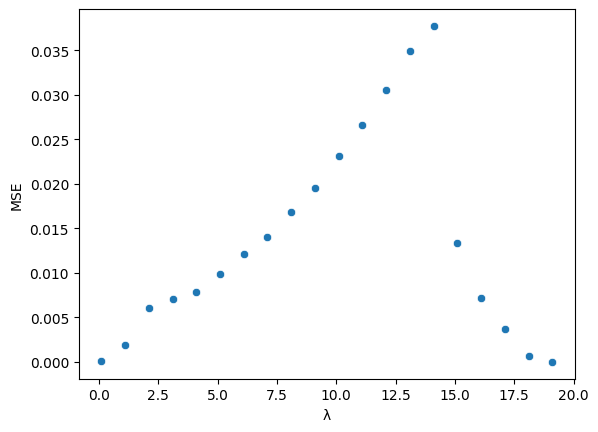

In [94]:
sns.scatterplot(x='λ', y='MSE', data=pd.DataFrame({'λ': alpha_vals_enet, 'MSE': MSEs_elasticnet}));

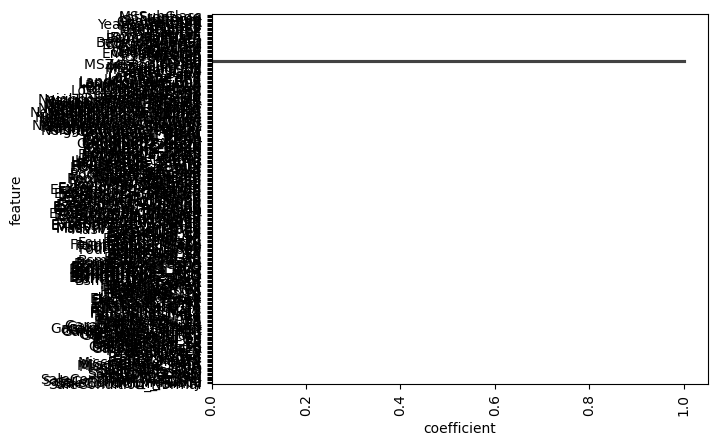

,feature,coefficient
0,MSSubClass,-5.422218e-06
1,LotFrontage,-5.422218e-06
2,LotArea,-5.422218e-06
3,OverallQual,-5.422218e-06
4,OverallCond,-5.422218e-06
...,...,...
567,SaleCondition_Abnorml,-2.596527e-07
568,SaleCondition_AdjLand,5.003062e-08
569,SaleCondition_Alloca,-1.500811e-08
570,SaleCondition_Family,-1.033190e-07


In [92]:
λ = min(zip(MSEs_elasticnet, alpha_vals_enet))[1]
model_enet = linear_model.Ridge(alpha=λ, fit_intercept=True, max_iter=1000000).fit(X, y)
intercept  = pd.DataFrame({'feature': X.columns, 'coefficient': model_enet.intercept_})
elasticnet_a_df = pd.concat([intercept, pd.DataFrame({'feature': X.columns, 'coefficient': model_enet.coef_})], ignore_index=True)
ax = sns.barplot(x='coefficient', y='feature', data=elasticnet_a_df);
plt.xticks(rotation=90)
plt.show();

display(elasticnet_a_df)

# Balance between Lasso and Ridge

Question 7: Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge`, `Lasso`, anf `ElasticNet`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number.

# Analysis of Alpha Values

## Lasso

We see several coeff values approaching zero as we run the Lasso regression. I would choose ~3.75 for the alpha value in this case to avoid overfitting. We also see a little spike in MSE and a minor outlier at that time.

## Ridge

We see coeff values shrinking close to zero in the ridge regression. This one is really hard to interpret from the MSE, and perhaps I need to look at more metrics. I'd pick exactly 100, somewhere right in the middle, to approximate the regression.

## Elastic Net

We get slightly different values than with the Ridge, and can adjust based on l1/l2 ratio. I tried several different values, 100, 200, 500, 1000 and then down to 20 because it always dropped off to 0 significantly after ~20.

I would choose 15 as to avoid overfitting the model. 15 is also where we see a sharp decrease in MSE without going to zero.

Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:

What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work

# Q8

1. No incoming experience! But I was wondering when we would get to a part where we would try to remove unnecessary coefficients from our models.
2. A lot of obstacles this time - not sure how to properly render the alpha values by coefficients. I tried to glean something from the case study as a workaround, but it could probably be improved or changed in a way to be more readable. Obviously if we just removed the 0'd coefficients and graphed it, we'd see some changes too:
```
np.array(data.columns)[coeff>=0]
```
Selecting the right value for alpha is a bit challenging.

3. I didn't scale the data this time or do any sort of heavy pre-processing. I didn't remove any other features other than ID which could've influenced some things.
4. I learned that visualization can be difficult! If one were to show those feature plots for the coefficients (as pictured) in a presentation there wouldn't be much of any value added without cleanup. The plots are useful in looking at the alpha values though.
5. Were we supposed to do AIC/BIC/CV stuff as well?